## Нахождение минимума функций 
Постановка задачи

$U - $ множество допустимых решений.  
Определена функция $f(x), x \in U$. 

Предполагается, что функция ограничена снизу.  
Без ограничения общности будем считать, что $f(x) \ge 0$

* Поиск $x^* \in U$ т. ч. $f(x^*) = \displaystyle\min_{x \in U}(f(x))$
* Поиск минимизирующей последовательности ${x_n}  \subset U$ т. ч.  $f(x_n) \rightarrow \displaystyle\min_{x \in U}(f(x))$

## Уточняющие видеоматериалы 

Метод отжига и оптимизация негладких функций  
https://www.mathnet.ru/php/seminars.phtml?option_lang=rus&presentid=17835  

Метод роения частиц и коллективные методы оптимизации  
https://www.mathnet.ru/php/seminars.phtml?option_lang=rus&presentid=17970 


Генетические алгоритмы и их применения  
https://www.mathnet.ru/php/seminars.phtml?option_lang=rus&presentid=18138



## Агентное моделирование
Агент -- самостоятельный элемент способный вычислять значения функции в некоторой точке.  
При выборе своих действий агент пользуется знаниями других агентов или непосредственно с ними взаимодействует.

## Метод роя частиц
Метод роя частиц (МРЧ), [particle swarm optimization (PSO)] -- метод численной оптимизации, для использования которого не требуется знать точного градиента оптимизируемой функции.

В методе роя частиц в качестве агента выступает "пчела".

Пчела летает по области определения функции и может вычислять ее значение.  
Пчела имеет память и помнит место, где наблюдалось минимальное значение функции (для данной пчелы). Обозначим $P^i$, где i - номер пчелы.  
При этом рой пчел обменивается этими данными (положением минимального значения функции для каждой пчелы). Врезультате чего, все пчелы знают положение минимиального значения функции среди минимальных значений всех пчел (обозначим $P^{abs}$). 


При выборе направления полета, каждая пчела корректирует со случайным весом вектор скорости в направлении $P^i$ и $P^{abs}$


Псевдокод метода Роя частиц

Параметры модели:  
$\alpha, \beta, \gamma$ -- положительные константы каждая из которых меньше 1.  

Создаем N пчел.  
Каждую пчелу случайным образом размещаем (равномерно) в области поиска минимума функции.  
Каждой пчеле случайным образом задается вектор скорости компоненты которого равны $v_j^i$. Здесь i -- номер пчелы, $j = \{1,2,..d\}$, $d$ -- размерность X (если f(X) -- функция 2-х переменных, то d = 2, если 3-x, то d = 3 и т.д.).  
ВАЖНО! Значения  компонент скорости пчел должны быть  сопоставимы с соответствующими размерами X (примерно 1/10 или 2/10).     

Начало цикла:
 1. Каждая пчела обновляет значение $P^i$  
 2. Пчелы обмениваются информацией и  обновляется  общий параметр $P^{abs}$  
 3. Для каждой пчелы вычисляется новая скорость, компоненты которой равны:   
 $v_j^i = \alpha  v_j^i +\xi \beta  (P^i_j - X_j) +\eta \gamma  (P^{abs}_j - X_j)$,  
 где, $\xi$ и $\eta$ -- случайные величины от 0 до 1, для каждой компоненты вычисляются заново, i -- номер пчелы. 
 4. Вычисляется новое положение каждой пчелы:  
 $x_j^i = x_j^i + v_j^i$
 5. Переход к 1


Метод роя частиц заканчивается, если:
* $X^i$ вышел за границы определения $X$
* Скорость движения пчел становится маленькой  
* достигнут лимит итераций

### Задание № 1  
Реализовать метод роя частиц  для функции:  
$f(x) = x^2|2 + sin(4x)|$  
$x \in (-10, 10)$  
Для малого количества пчел (N < 10) построить график функции и на нем маршрут движения всех пчел. 

решить задачу двумя способами:  
 1. Используя функциональное программирование
 2. Используя классы. Пчела - класс, рой - класс

### Реализация с использованием ООП

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
def f(X):
    return pow(X[0] + 5, 2) * abs(2 + np.sin(4 * X[0]))

In [5]:
def module(X):
    module = 0
    for x in X:
        module += pow(x, 2)
    return np.sqrt(module)

In [6]:
def out_of_limits(X, lower_bound, upper_bound):
    for i in range(len(X)):
        if not (lower_bound[i] <= X[i] <= upper_bound[i]):
            return True
    return False

In [7]:
def grapher(X_current, X_old):
    # plt.annotate('', xy=(X_new[0], f(X_new)), xytext=(X_old[0], f(X_old)), arrowprops=dict(width=0.5, color='r'))
    # plt.plot([X_current[0], X_old[0]], [f(X_current), f(X_old)], c='r')
    plt.scatter(X_current[0], f(X_current),)

In [ ]:
class Bee:
    def __init__(self, dimentions, limits, alpha, beta, gamma):
        self.lower_bound = limits[0]
        self.upper_bound = limits[1]
        self.dimentions = dimentions
        self.location = np.array([random.uniform(self.lower_bound[0], self.upper_bound[0]) for i in range(self.dimentions)])
        # np.random.choice([i for i in range(self.lower_bound[0], self.upper_bound[0])], self.dimentions)
        self.velocity = np.array([random.uniform(self.lower_bound[0], self.upper_bound[0]) / 10 for i in range(self.dimentions)])
        # np.random.choice([(i + 1) / 10 - self.lower_bound[0] / 10 for i in range(self.lower_bound[0], self.upper_bound[0])], self.dimentions)
        self.best_location = self.location
        
        # print(self.location)
        
        self.value = f(self.location)
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def __repr__(self):
        return f'Location{self.location}, velocity {self.velocity}, best {self.best_location}, value {self.value}'

    def iteration(self):
        epsilon, teta = np.random.sample(2, )
        self.velocity = self.alpha * self.velocity + self.beta * epsilon * (
                self.best_location - self.location) + self.gamma * teta * (best_location - self.location)

        # print(self.velocity)

        save_location = self.location
        self.location = self.location + self.velocity

        if out_of_limits(self.location, self.lower_bound, self.upper_bound):
            self.location = save_location

        # print(self.location)

        grapher(self.location, save_location)

        if f(self.location) <= f(self.best_location):
            self.best_location = self.location

In [ ]:
class Beehive:
    def __init__(self, N, dimentions, limits):
        self.alpha = 0.95
        self.beta = 0.95
        self.gamma = 0.95
        self.bees = [Bee(dimentions, limits, self.alpha, self.beta, self.gamma) for i in range(N)]

    def intelligence(self):
        # stopping conditions
        iterations = 0
        all_bees_out_of_limits = False
        min_velocity = 1e-3
        iterations_limit = 1e2
        highest_velocity = [min_velocity]

        best_location_bee = sorted(self.bees, key=lambda bee: bee.value, reverse=True)[-1:]
        best_location = best_location_bee[0].location

        while module(highest_velocity) >= min_velocity and (iterations < iterations_limit) and not (
                all_bees_out_of_limits):
            iterations += 1

            for bee in self.bees:
                bee.iteration()
            #     print(bee)
            # print('\n')

            best_location_bee = sorted(self.bees, key=lambda bee: bee.value, reverse=True)[-1:]
            new_best_location = best_location_bee[0].location

            if f(new_best_location) < f(best_location):
                best_location = new_best_location

            highest_velocity_bee = sorted(self.bees, key=lambda bee: module(bee.velocity))[-1:]
            highest_velocity = highest_velocity_bee[0].velocity

        return best_location

[-4.99737246]


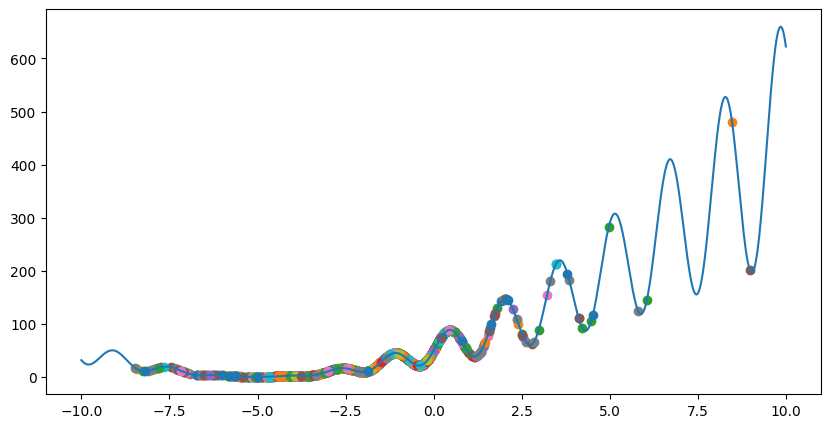

In [ ]:
X = np.arange(-10, 10, 0.01)
Y = np.array([f([x]) for x in X])

plt.figure(figsize=(10, 5))
plt.plot(X, Y)

for i in range(1):
    best_location = [0]

    hive = Beehive(15, 1, [[-10], [10]])
    result = hive.intelligence()
    print(result)

    plt.scatter(result, f(result))
    # plt.scatter(bee.best_location, f(bee.best_location))
plt.show()

### Реализация с использованием функционального программирования

In [16]:
def PSO_algorithm(N, limits, iterations_limit=1e3, min_velocity=1e-3):
    # Начальная настройка роя частиц
    location = np.array([random.uniform(limits[0], limits[1]) for i in range(N)])
    velocity = np.array([random.uniform(limits[0], limits[1]) / 10 for i in range(N)])
    best_location = location.copy()
    best_f = np.array([f([x]) for x in location])
    global_best_location = location[0]
    global_best_f = best_f[0]
    all_bees_out_of_limits = False
    iterations = 0
    trace = []
    alpha, beta, gamma = np.random.sample(3, )
    
    # Запуск алгоритма
    while max(abs(velocity)) >= min_velocity and (iterations < iterations_limit) and not (all_bees_out_of_limits):
        iterations += 1
        for j in range(N):
            # Обновление скорости и положения пчелы
            epsilon, teta = np.random.sample(2, )
            velocity[j] = alpha * velocity[j] + beta * epsilon * (best_location[j] - location[j]) + gamma * teta * (global_best_location - location[j])
            save_location = location[j]
            location[j] =+ velocity[j]

            
            # Ограничение на размер области
            if out_of_limits([location[j]], [limits[0]], [limits[1]]):
                location[j] -= velocity[j]
            else:
                grapher([location[j]], [save_location])
                
            # Обновление персонального лучшего положения
            f_value = f([location[j]])
            if f_value < best_f[j]:
                best_location[j] = location[j]
                best_f[j] = f_value
                
            # Обновление глобального лучшего положения
            if f_value < global_best_f:
                global_best_location = location[j]
                global_best_f = f_value
        
        trace.append(global_best_f)
        
    return global_best_location, trace

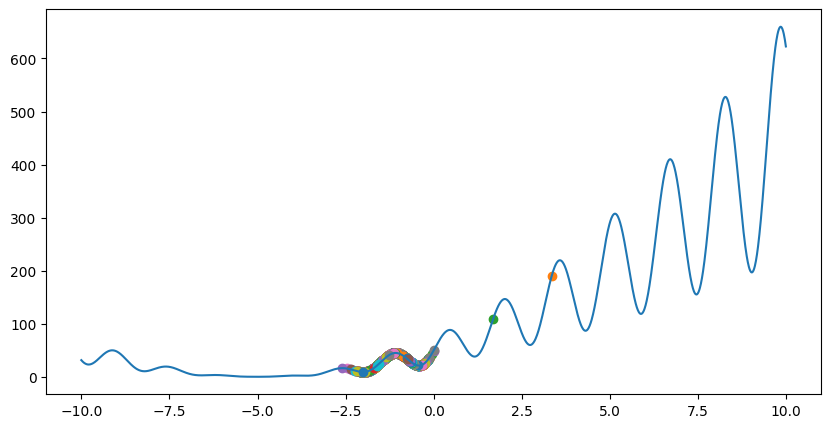

In [17]:
X = np.arange(-10, 10, 0.01)
Y = np.array([f([x]) for x in X])

plt.figure(figsize=(10, 5))
plt.plot(X, Y)

result, trace = PSO_algorithm(3, [-10, 10])

plt.scatter(result, f([result]))
    # plt.scatter(bee.best_location, f(bee.best_location))
plt.show()

### Задание № 2  
Реализовать метод роя частиц  для функции:  
$f(x,y) = (1 - x^2) + 100(x - y^2)^2$  
$x \in (-10, 10), y \in (-10, 10)$  

Использовать на данной функции реализованный ранее метод градиентного спуска. Показать положение сходящийся последовательности на контурной карте. (метод должен работать плохо!).   
Для малого колличества пчел (N < 15) построить контурную карту и на ней отложить маршруты движения всех пчел. 

При решении задания использовать классы

In [ ]:
def f(X):
    return (1 - pow(X[0], 2)) + 100 * pow(X[0] - pow(X[1], 2), 2)

In [ ]:
def grapher(X_current, X_old):
    pass
    # # plt.annotate('', xy=(X_new[0], f(X_new)), xytext=(X_old[0], f(X_old)), arrowprops=dict(width=0.5, color='r'))
    # plt.plot([X_current[0], X_old[0]], [X_current[1], X_old[1]], c='r')

[ 1.42919377 -1.31724576]


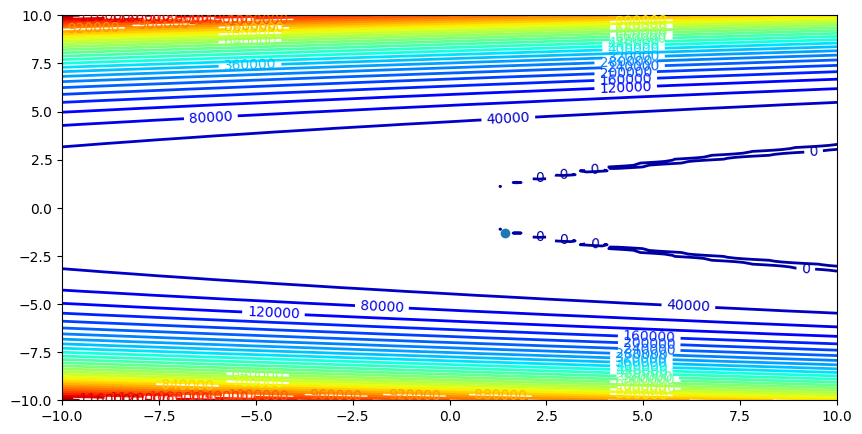

In [ ]:
X_max = [10, 10]
X_min = [-10, -10]
X0 = [4, 2]

x = np.linspace(X_min[0], X_max[0], 100)
y = np.linspace(X_min[1], X_max[1], 100)
X, Y = np.meshgrid(x, y)
F = f((X, Y))

plt.figure(figsize=(10, 5))
ptr = plt.contour(X, Y, F, cmap=plt.cm.jet, linewidths=2, levels=30)
plt.clabel(ptr, inline=1, fontsize=10)

best_location = [-2, 0]

hive = Beehive(10, 2, [[-10, -10], [10, 10]])
result = hive.intelligence()

print(result)

plt.scatter(result[0], result[1])

plt.show()

Решение с использованием градиентного спуска

In [ ]:
def dfdx(X, f, h):
    gradient = np.zeros(len(X))
    for i in range(len(X)):
        temp = np.zeros(len(X))
        temp[i] = X[i] + h
        right = f(temp)
        temp[i] = X[i] - 2 * h
        left = f(temp)
        gradient[i] += (right - left) / (2 * h)
    return gradient

In [ ]:
def grapher(X_new, X_old):
    plt.annotate('', xy=(X_new[0], X_new[1]), xytext=(X_old[0], X_old[1]), arrowprops=dict(width=0.5, color='r'))

In [ ]:
def gradient_descent(X_new, f, lamb=0.1, alpha=0, epsilon=1E-6, max_iter=1E6):
    iter = 0
    X_old = X_new + epsilon + 1
    while sum(abs(X_old - X_new)) > epsilon and iter < max_iter:
        iter += 1
        X_old = X_new
        X_new = X_new - lamb * dfdx(X_new, f, epsilon)
        lamb = lamb * (1 - alpha)
        grapher(X_new, X_old)
    return X_new

In [ ]:
X_max = [10, 10]
X_min = [-10, -10]
X0 = [-1, 1]

x = np.linspace(X_min[0], X_max[0], 100)
y = np.linspace(X_min[1], X_max[1], 100)
X, Y = np.meshgrid(x, y)
F = f((X, Y))

plt.figure(figsize=(10, 5))
ptr = plt.contour(X, Y, F, cmap=plt.cm.jet, linewidths=2, levels=30)
plt.clabel(ptr, inline=1, fontsize=10)
print(gradient_descent(np.array(X0), f))

plt.show()

[-1.          0.01185541]


## Генетические алгоритмы

Генетический алгоритм -- эвристический алгоритм поиска, используемый для решения задач оптимизации и моделирования путём случайного подбора, комбинирования и вариации искомых параметров с использованием механизмов, аналогичных естественному отбору в природе.

Реализация генетического алгоритма включает в себя возможность:
 * Генерация особей
 * отбор (отбрасывание слабых особей)
 * скрещивание (кроссинговеринг) -- алгоритм выбора генов двух особей при скрещивании
 * мутация -- алгоритм изменения особей

In [ ]:
def F(X):
    return -np.sin(X[0]) + np.sin(X[1]) + 2

In [ ]:
class Person():
    def __init__(self, d=1):
        self.d = d
        self.X = np.zeros(d)

    def create_new(self, xmean=0, deviation=1):
        self.X = 2 * deviation * (np.random.rand(self.d) - 0.5) + xmean

    def crossing_over(self, other, pd=0.5):
        child_index = np.random.choice([0, 1], self.d, p=(pd, 1 - pd))
        X = []  # хромосомы потомка
        for i, ni in enumerate(child_index):
            if ni == 0:
                X.append(self.X[i])
            elif ni == 1:
                X.append(other.X[i])
        child = Person(self.d)  # потомок
        child.X = np.array(X)
        return child

In [ ]:
class Population():
    # класс популяции
    def __init__(self, N, x_min, x_max, function, threshold_live=0.8):
        self.N = N  # размер популяции
        # xmin - np.array длиной d, содержит минимальное значение хромосом
        # xmax - np.array длиной d, содержит максимальное значение хромосом      
        self.d = len(x_min)
        self.x_mean = (x_max - x_min) / 2
        self.deviation = x_max - self.x_mean
        self.f = function  # function - функция для нахожения минимума
        self.threshold = threshold_live  # threshold_live -  (0,1) - какая часть популяции остается в живых
        self.population = np.array([])
        for i in range(N):
            self.population = np.append(self.population, Person(self.d))
        for ind in self.population:
            ind.create_new(self.x_mean, self.deviation)

    def get_f_array(self):
        # находим массив значений F для каждой особи
        X = []
        for ind in self.population:
            X.append(self.f(ind.X))
        return np.array(X)

    def sort_pop(self):
        # сортируем особи по убыванию
        X = self.get_f_array()
        self.population = self.population[np.argsort(X)]

    def kill_weak(self):
        # отбрасываем слабые особи, на их место добавляем новые
        survivors = int(self.N * self.threshold)
        for i in range(survivors, self.N):
            self.population[i].create_new(self.x_mean, self.deviation)

    def new_generation(self):
        # генерация нового поколения
        self.sort_pop()
        self.kill_weak()
        new_population = []
        new_population.append(self.population[0])
        f_array = self.get_f_array()
        prob = 1 - (f_array - f_array.min()) / (f_array.max() - f_array.min())
        prob_norm = prob / prob.sum()
        for i in range(self.N - 1):
            j = np.random.choice([k for k in range(self.N)], p=prob_norm)
            new_population.append(self.population[i].crossing_over(self.population[j], prob[i]))
        self.ppopulation = np.array(new_population)

In [ ]:
def grapher(pop, Xmin, Xmax):
    fig = plt.figure(figsize=(7, 7))
    x = np.linspace(Xmin[0], Xmax[0], 100)
    y = np.linspace(Xmin[1], Xmax[1], 100)
    X, Y = np.meshgrid(x, y)
    f = F((X, Y))
    ptr = plt.contour(X, Y, f, cmap=plt.cm.jet, linewidths=2, levels=20)
    plt.clabel(ptr, inline=1, fontsize=10)
    plt.xticks(fontsize=20)  # Еще один способ задать размер меток на осях
    plt.yticks(fontsize=20)
    for ind in pop.population:
        plt.plot(ind.X[0], ind.X[1], "*", markersize=30)

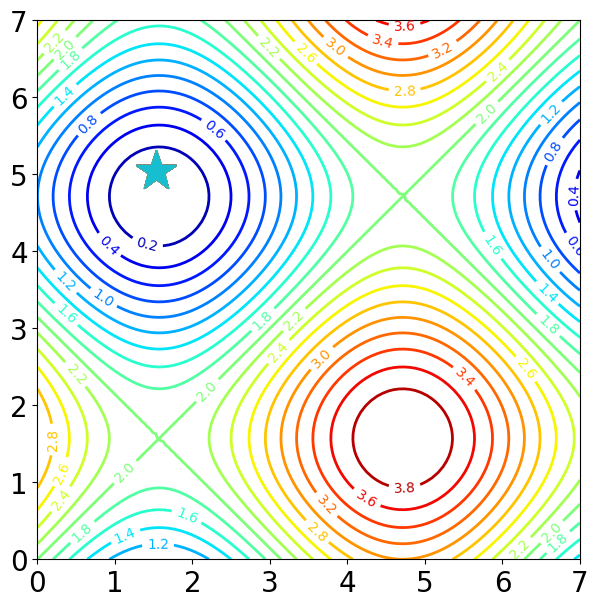

In [ ]:
X_min = (0, 0)
X_max = (7, 7)

population = Population(20, np.array(X_min), np.array(X_max), F, 0.7)

for i in range(100):
    population.new_generation()
grapher(population, X_min, X_max)

plt.show()

### Задание №3

На основе имеющегося класса создать модель генетического алгоритма. Для обновления популяции вместо генерации новых особей использовать мутацию. При мутации у особи случайные хромосомы изменяются на случайную величину. Вероятность мутации должна быть выше у более слабых особей.

In [ ]:
def F(X):
    return -np.sin(X[0]) + np.sin(X[1]) + 2

In [ ]:
class Person():
    def __init__(self, d=1):
        self.d = d
        self.X = np.zeros(d)

    def create_new(self, xmean=0, deviation=1):
        self.X = 2 * deviation * (np.random.rand(self.d) - 0.5) + xmean

    def crossing_over(self, other, pd=0.5):
        child_index = np.random.choice([0, 1], self.d, p=(pd, 1 - pd))
        X = []  # хромосомы потомка
        for i, ni in enumerate(child_index):
            if ni == 0:
                X.append(self.X[i])
            elif ni == 1:
                X.append(other.X[i])
        child = Person(self.d)  # потомок
        child.X = np.array(X)
        return child

    def mutation(self, delta):
        mutate = np.random.choice(2, self.d, p=[1-delta, delta])
        for i in range(len(mutate)):
            if mutate[i] == 1:
                self.X[i] += np.random.sample()

In [ ]:
class Population():
    # класс популяции
    def __init__(self, N, x_min, x_max, function, threshold_live=0.8):
        self.N = N  # размер популяции
        # xmin - np.array длиной d, содержит минимальное значение хромосом
        # xmax - np.array длиной d, содержит максимальное значение хромосом      
        self.d = len(x_min)
        self.x_mean = (x_max - x_min) / 2
        self.deviation = x_max - self.x_mean
        self.f = function  # function - функция для нахожения минимума
        self.threshold = threshold_live  # threshold_live -  (0,1) - какая часть популяции остается в живых
        self.population = np.array([])
        for i in range(N):
            self.population = np.append(self.population, Person(self.d))
        for ind in self.population:
            ind.create_new(self.x_mean, self.deviation)

    def get_f_array(self):
        # находим массив значений F для каждой особи
        X = []
        for ind in self.population:
            X.append(self.f(ind.X))
        return np.array(X)

    def sort_pop(self):
        # сортируем особи по убыванию
        X = self.get_f_array()
        self.population = self.population[np.argsort(X)]

    def mutation_weak(self):
        # отбрасываем слабые особи, на их место добавляем новые
        survivors = int(self.N * self.threshold)
        for i in range(survivors, self.N):
            delta = (self.f(self.population[i].X) - self.f(self.population[0].X)) / self.f(self.population[i].X)
            self.population[i].mutation(delta)

    def new_generation(self):
        # генерация нового поколения
        self.sort_pop()
        self.mutation_weak()

        new_population = []
        new_population.append(self.population[0])
        f_array = self.get_f_array()
        prob = 1 - (f_array - f_array.min()) / (f_array.max() - f_array.min() + 1)
        prob_norm = prob / prob.sum()
        for i in range(self.N - 1):
            j = np.random.choice([k for k in range(self.N)], p=prob_norm)
            new_population.append(self.population[i].crossing_over(self.population[j], prob[i]))
        self.population = np.array(new_population)

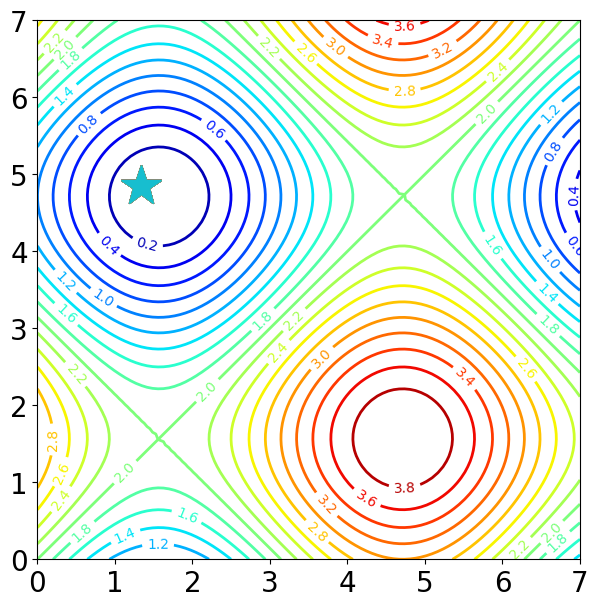

In [ ]:
X_min = (0, 0)
X_max = (7, 7)

population = Population(20, np.array(X_min), np.array(X_max), F, 0.7)

for i in range(500):
    population.new_generation()
grapher(population, X_min, X_max)

## Задание №4

Решить задачу о расстановке N ферзей на шахматной доске с помощью генетического алгоритма.  
Если найдено решение ($f(x) = 0$, то необходимо завершить программу, вывести расстановку (функция ниже) и количество поколений.


In [ ]:
import seaborn as sns

In [ ]:
def F(X):
    interfere = 0
    for i in range(len(X)):
        for j in range(i + 1, len(X)):
            if X[i] == X[j]:
                interfere += 1
            if abs(X[i] - X[j]) == abs(i - j):
                interfere += 1
    return interfere

In [ ]:
class Person():
    def __init__(self, d=1):
        self.d = d
        self.X = np.zeros(d)

    def create_new(self, xmean=0, deviation=1):
        self.X = np.array(random.sample([i for i in range(self.d)], self.d))

    def __repr__(self):
        return f'{self.X}'

    def crossing_over(self, other, pd=0.5):
        child_index = np.random.choice([0, 1], self.d, p=(pd, 1 - pd))
        X = []  # хромосомы потомка
        for i, ni in enumerate(child_index):
            if ni == 0:
                X.append(self.X[i])
            elif ni == 1:
                X.append(other.X[i])
        child = Person(self.d)  # потомок
        child.X = np.array(X)
        return child

    def mutation(self, delta):
        mutate = np.random.choice(2, self.d, p=[1-delta, delta])
        for i in range(len(mutate)):
            if mutate[i] == 1:
                self.X[i] += np.random.sample()

In [ ]:
class Population():
    # класс популяции
    def __init__(self, N, x_min, x_max, function, threshold_live=0.8):
        self.N = N  # размер популяции
        # xmin - np.array длиной d, содержит минимальное значение хромосом
        # xmax - np.array длиной d, содержит максимальное значение хромосом      
        self.d = len(x_min)
        self.x_mean = (x_max - x_min) / 2
        self.deviation = x_max - self.x_mean
        self.f = function  # function - функция для нахожения минимума
        self.threshold = threshold_live  # threshold_live -  (0,1) - какая часть популяции остается в живых
        self.population = np.array([])
        for i in range(N):
            self.population = np.append(self.population, Person(self.d))
        for ind in self.population:
            ind.create_new(self.x_mean, self.deviation)

    def get_f_array(self):
        # находим массив значений F для каждой особи
        X = []
        for ind in self.population:
            X.append(self.f(ind.X))
        return np.array(X)

    def sort_pop(self):
        # сортируем особи по убыванию
        X = self.get_f_array()
        self.population = self.population[np.argsort(X)]

    def mutation_weak(self):
        # отбрасываем слабые особи, на их место добавляем новые
        survivors = int(self.N * self.threshold)
        for i in range(survivors, self.N):
            delta = random.randint(0, self.d - 1)
            self.population[i].mutation(delta /  self.d)

    def generations(self):
        while True:
            self.sort_pop()
            self.mutation_weak()

            # for x in self.population:
            #     print(x)
            # print('\n')

            f_array = self.get_f_array()

            new_population = []
            new_population.append(self.population[0])
            prob = 1 - (f_array - f_array.min()) / (f_array.max() - f_array.min() + 1)
            prob_norm = prob / prob.sum()

            for i in range(self.N - 1):
                j = np.random.choice([k for k in range(self.N)], p=prob_norm)
                new_population.append(self.population[i].crossing_over(self.population[j], prob[i]))
            self.population = np.array(new_population)

            for i in range(self.d):
                if self.f(self.population[i].X) == 0:
                    return self.population[i].X

In [ ]:
# функция вывода ферзей
def print_position(position):
    N = len(position)
    for i in range(N):
        print(" _", end="")

    print("", end="\n")

    for i in range(N):
        print("", end="|")
        for j in range(N):
            if j == position[i]:
                print("F", end="")
            else:
                print("O", end="")
            print("", end="|")
        print("", end="\n")

    for i in range(N):
        print(" \u203E", end="")
    print("", end="\n")

In [ ]:
N = 10
X_min = [0 for i in range(N)]
X_max = [N - 1 for i in range(N)]

population = Population(1000, np.array(X_min), np.array(X_max), F, 0.5)
best_solve = population.generations()

print(population.generations())

[5 7 9 1 3 8 0 2 4 6]


In [ ]:
print_position(best_solve)

 _ _ _ _ _ _ _ _ _ _
|O|O|O|O|O|F|O|O|O|O|
|O|O|O|O|O|O|O|F|O|O|
|O|O|O|O|O|O|O|O|O|F|
|O|F|O|O|O|O|O|O|O|O|
|O|O|O|F|O|O|O|O|O|O|
|O|O|O|O|O|O|O|O|F|O|
|F|O|O|O|O|O|O|O|O|O|
|O|O|F|O|O|O|O|O|O|O|
|O|O|O|O|F|O|O|O|O|O|
|O|O|O|O|O|O|F|O|O|O|
 ‾ ‾ ‾ ‾ ‾ ‾ ‾ ‾ ‾ ‾


<Axes: >

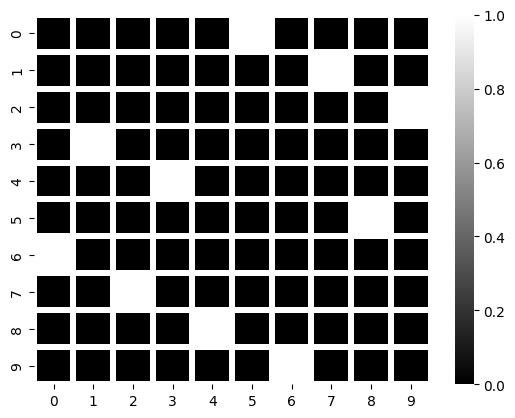

In [ ]:
chess_board = [[1 if i == j else 0 for i in range(N)] for j in best_solve]
sns.heatmap(chess_board, linewidths=3, cmap='gray')